In [1]:
!pip install gymnasium

import random
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob
import io
import base64

In [2]:
def show_video(env_name):
    mp4list = glob.glob('*.mp4')
    if len(mp4list) > 0:
        mp4 = '{}.mp4'.format(env_name)
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay loop controls style="height: 400px;"><source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("no se pudo encontrar el video")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# prueba con acciones aleatorias
env_name = "Taxi-v3"
env = gym.make(env_name, render_mode="rgb_array")
vid = video_recorder.VideoRecorder(env, path="{}.mp4".format(env_name))
state = env.reset()
done = False
for t in range(100):
  vid.capture_frame()
  action = env.action_space.sample()
  next_state, reward, done, _, _ = env.step(action)
  state = next_state
  if done:
    break
vid.close()
env.close()

show_video(env_name)

/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(


In [10]:
# Inicialización del entorno
env = gym.make("Taxi-v3", render_mode="rgb_array")
env.reset()
env.render()

array([[[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[114, 116, 115],
        [114, 116, 115],
        [126, 127, 126],
        ...,
        [112, 113, 111],
        [112, 113, 111],
        [118, 117, 115]],

       ...,

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[115, 112, 112],
        [115, 112, 112],
        [119, 119, 117],
        ...,
        [123, 119, 118],
        [123, 119, 118],
        [114, 114, 117]]

In [11]:
# Verificación del espacio de estados y espacio de acciones
print("Espacio de acciones: {}".format(env.action_space))
print("Espacio de estados: {}".format(env.observation_space))

Espacio de acciones: Discrete(6)
Espacio de estados: Discrete(500)


In [12]:
# Hiperparámetros

alpha = 0.8
gamma = 0.9
epsilon = 0.99 # epsilon-greedy
max_epsilon = 1
min_epsilon = 0.01
decaimiento = 0.01

episodios_entrenamiento = 1000
maximo_pasos = 100

# Inicialización de Q
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [13]:
# Entrenamiento usando Q-learning

recompensas_entrenamiento = []
epsilons = []

for episodio in range(episodios_entrenamiento):
    print("====== EPISODIO {} ======".format(episodio))
    estado, info = env.reset()
    total_recompensas_entrenamiento = 0

    for paso in range(maximo_pasos):
        env.render()
        p = random.uniform(0, 1)
        if p < epsilon:
            accion = env.action_space.sample()
        else:
            accion = np.argmax(Q[estado,:])

        nuevo_estado, recompensa, fin, _, info = env.step(accion)
        Q[estado, accion] = Q[estado, accion] + alpha * (recompensa + gamma * np.max(Q[nuevo_estado, :]) - Q[estado, accion])
        total_recompensas_entrenamiento += recompensa
        estado = nuevo_estado

        if fin:
            print ("Recompensa total del episodio {}: {}".format(episodio, total_recompensas_entrenamiento))
            break

    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decaimiento*episodio)

    recompensas_entrenamiento.append(total_recompensas_entrenamiento)
    epsilons.append(epsilon)

print ("Recompensas de entrenamiento en el tiempo: " + str(sum(recompensas_entrenamiento)/episodios_entrenamiento))

====== EPISODIO 0 ======
====== EPISODIO 1 ======
====== EPISODIO 2 ======
====== EPISODIO 3 ======
====== EPISODIO 4 ======
====== EPISODIO 5 ======
====== EPISODIO 6 ======
====== EPISODIO 7 ======
====== EPISODIO 8 ======
====== EPISODIO 9 ======
====== EPISODIO 10 ======
====== EPISODIO 11 ======
====== EPISODIO 12 ======
====== EPISODIO 13 ======
====== EPISODIO 14 ======
====== EPISODIO 15 ======
====== EPISODIO 16 ======
====== EPISODIO 17 ======
====== EPISODIO 18 ======
====== EPISODIO 19 ======
====== EPISODIO 20 ======
====== EPISODIO 21 ======
====== EPISODIO 22 ======
====== EPISODIO 23 ======
====== EPISODIO 24 ======
====== EPISODIO 25 ======
====== EPISODIO 26 ======
====== EPISODIO 27 ======
====== EPISODIO 28 ======
====== EPISODIO 29 ======
====== EPISODIO 30 ======
====== EPISODIO 31 ======
====== EPISODIO 32 ======
====== EPISODIO 33 ======
====== EPISODIO 34 ======
====== EPISODIO 35 ======
====== EPISODIO 36 ======
====== EPISODIO 37 ======
====== EPISODIO 38 ===

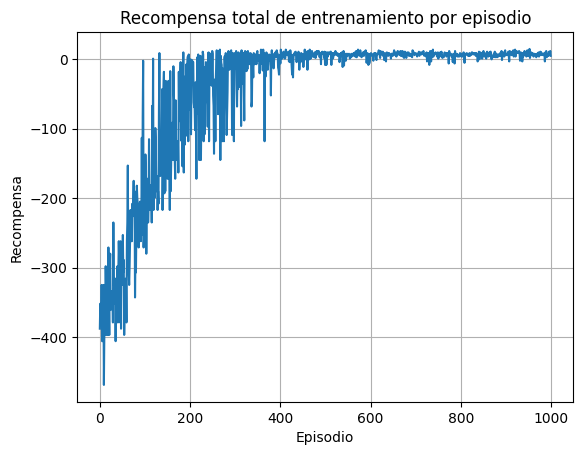

In [14]:
# Gráfico con evolución de la recompensa total obtenida en cada episodio de aprendizaje
x = range(episodios_entrenamiento)
plt.plot(x, recompensas_entrenamiento)
plt.xlabel('Episodio')
plt.ylabel('Recompensa')
plt.title('Recompensa total de entrenamiento por episodio')
plt.grid(True)
plt.show()



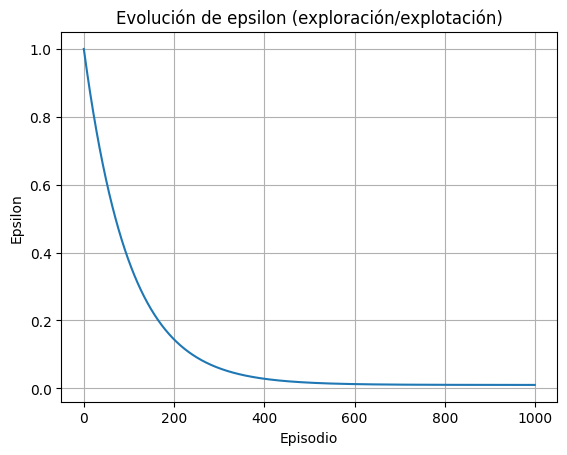

In [15]:
# Gráfico con evolución de epsilon por cada episodio, para una política epsilon-greedy

plt.plot(epsilons)
plt.xlabel('Episodio')
plt.ylabel('Epsilon')
plt.title("Evolución de epsilon (exploración/explotación)")
plt.grid(True)
plt.show()

In [16]:
# Usando el aprendizaje realizado

vid = video_recorder.VideoRecorder(env, path="{}.mp4".format("Taxi-v3"))
estado, info = env.reset()

paso = 0
fin = False
total_recompensas = 0

for paso in range(maximo_pasos):
  env.render()
  vid.capture_frame()
  accion = np.argmax(Q[estado, :])
  nuevo_estado, recompensa, fin, _, info = env.step(accion)
  total_recompensas += recompensa

  if fin:
    print('Retorno obtenido en episodio {}: {}'.format(episodio,total_recompensas))
    break
  estado = nuevo_estado

vid.close()
env.close()
print("Recompensa total del episodio:", total_recompensas)

show_video('Taxi-v3')

/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(


Retorno obtenido en episodio 999: 8
Recompensa total del episodio: 8
